Your task is to execute the process for proactive detection of fraud while answering following 
questions. 
1. Data cleaning including missing values, outliers and multi-collinearity.  

2. Describe your fraud detection model in elaboration.  
    I have done Data Preprocessing by Checking for missing values, null values
    I have done Feature Engineering by creating new columns for difference of old and nde balances in origin and destination accounts 
    I have done Exploratory Data Analysis (EDA) 

4. How did you select variables to be included in the model?  
    I have checked correlation between target variable with remaining variables.I have included all the features as almost all the features are
    important , we can remove nameOrig, nameDest, diffBalOrg, diffBalDest as they have very weak correlations but i have retained them to get more
    insights.
   
6. Demonstrate the performance of the model by using best set of tools.  
    I have used Logistic Regression, Random Forest, XGBoost, Naive Bayes, K Nearest Neighbors, Decision Tree.
   
8. What are the key factors that predict fraudulent customer?  
    Key factors that predict fraudulent customer are isFraud and amount

9. Do these factors make sense? If yes, How? If not, How not?  
    yes if the amount is more we can assume it might be a fraudualent transaction and if isfraud is 1 then the chances of it being isFlaggedFraud is
    more.

10. What kind of prevention should be adopted while company update its infrastructure? 
    Setting limit on amount of transaction, if it exceeds the limit then there must be authentication system to confirm the person's identity and
    transaction must be initated only if the authentication is successful.
    
12. Assuming these actions have been implemented, how would you determine if they work? 
    we can use confusion matrix to check Fraud Rate, False Positive Rate.
    Along with this we can add few other features to get more insights on authentication failure rate, Success rate of authentication requests,
    patterns of failed transactions etc
 


In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import os,sys

In [4]:
df = pd.read_csv("Fraud.csv",index_col = 0)

In [3]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,,,,,,,,,,
1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.shape

(6362620, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6362620 entries, 1 to 743
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   type            object 
 1   amount          float64
 2   nameOrig        object 
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   nameDest        object 
 6   oldbalanceDest  float64
 7   newbalanceDest  float64
 8   isFraud         int64  
 9   isFlaggedFraud  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 534.0+ MB


In [6]:
df.describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [7]:
df.isnull().sum()

type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
df.isna().sum()

type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [9]:
df.columns

Index(['type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [10]:
df['type'].nunique()

5

In [11]:
df['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [12]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [13]:
df['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [14]:
# this is unbalanced data

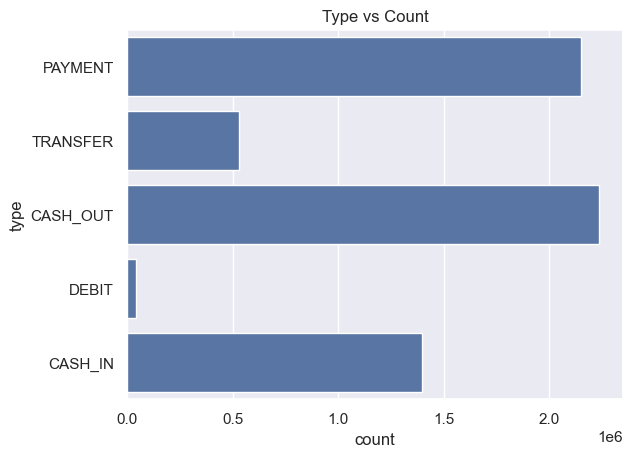

In [15]:
sns.countplot(df['type'])
plt.title('Type vs Count')
plt.show()

In [16]:
df_isfraud = df.loc[df['isFraud']==1]

In [17]:
df_isfraud

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,,,,,,,,,,
1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...
743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0


In [18]:
df_isFlaggedFraud = df.loc[df['isFlaggedFraud'] == 1]

In [19]:
df_isFlaggedFraud

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,,,,,,,,,,
212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1


In [20]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,,,,,,,,,,
1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df['diffBalOrg'] = df['newbalanceOrig'] - df['oldbalanceOrg']

In [22]:
df['diffBalOrg']

step
1        -9839.64
1        -1864.28
1         -181.00
1         -181.00
1       -11668.14
          ...    
743    -339682.13
743   -6311409.28
743   -6311409.28
743    -850002.52
743    -850002.52
Name: diffBalOrg, Length: 6362620, dtype: float64

In [23]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,diffBalOrg
step,,,,,,,,,,,
1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,-9839.64
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,-1864.28
1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,-181.00
1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,-181.00
1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,-11668.14


In [6]:
df['diffBalDest'] = df['newbalanceDest'] - df['oldbalanceDest']

In [25]:
df['diffBalDest']

step
1            0.00
1            0.00
1            0.00
1       -21182.00
1            0.00
          ...    
743     339682.13
743          0.00
743    6311409.27
743          0.00
743     850002.52
Name: diffBalDest, Length: 6362620, dtype: float64

In [26]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,diffBalOrg,diffBalDest
step,,,,,,,,,,,,
1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,-9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,-1864.28,0.0
1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,-181.00,0.0
1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,-181.00,-21182.0
1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,-11668.14,0.0


In [27]:
df.describe(include = ['object'])

,type,nameOrig,nameDest
count,6362620,6362620,6362620
unique,5,6353307,2722362
top,CASH_OUT,C1902386530,C1286084959
freq,2237500,3,113


In [7]:
def feature_separation(df):
    categorical_features = []
    non_categorical_features = []
    discrete_features = []
    continuous_features = []

    for column in df :
        if df[column].dtype == 'object':
            if df[column].nunique() <=10:
                categorical_features.append(column)
            else:
                non_categorical_features.append(column)
        elif df[column].dtype in ['int64','float64']:
            if df[column].nunique() <= 10:
                discrete_features.append(column)
            else:
                continuous_features.append(column)
    return categorical_features,non_categorical_features,discrete_features,continuous_features


In [8]:
categorical_features,non_categorical_features,discrete_features,continuous_features = feature_separation(df)

In [30]:
categorical_features

['type']

In [31]:
non_categorical_features

['nameOrig', 'nameDest']

In [32]:
discrete_features

['isFraud', 'isFlaggedFraud']

In [33]:
continuous_features

['amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest',
 'diffBalOrg',
 'diffBalDest']

In [59]:
from scipy.stats import f_oneway

for cat in categorical_features:
    print(f"Results for {cat}:")
    for con in continuous_features:
        groups = [df[df[cat]==group][con] for group in df[cat].unique()]
    
        if all(not group.empty for group in groups):
            f_stat,p_val = f_oneway(*groups)
            print(f'Anova for {cat} and {con} - fvalue:{f_stat},p-value:{p_val}')
        else:
            print(f'Anova for {cat} and {con} : One or more groups are empty')
            
    print()

Results for type:
Anova for type and amount - fvalue:278715.5420788363,p-value:0.0
Anova for type and oldbalanceOrg - fvalue:549671.9712433635,p-value:0.0
Anova for type and newbalanceOrig - fvalue:612986.0504282945,p-value:0.0
Anova for type and oldbalanceDest - fvalue:102355.6731263596,p-value:0.0
Anova for type and newbalanceDest - fvalue:134418.9167074142,p-value:0.0
Anova for type and diffBalOrg - fvalue:657315.3236166708,p-value:0.0
Anova for type and diffBalDest - fvalue:226976.15145767527,p-value:0.0



In [9]:
df_dummies = pd.get_dummies(df[categorical_features],drop_first = True).astype(int)

In [10]:
df_dummies

,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
step,,,,
1,0,0,1,0
1,0,0,1,0
1,0,0,0,1
1,1,0,0,0
1,0,0,1,0
...,...,...,...,...
743,1,0,0,0
743,0,0,0,1
743,1,0,0,0


In [11]:
df_new = pd.concat([df.drop(columns = categorical_features),df_dummies],axis = 1)

In [12]:
df_new

,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,diffBalOrg,diffBalDest,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
step,,,,,,,,,,,,,,,
1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,-9839.64,0.00,0,0,1,0
1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,-1864.28,0.00,0,0,1,0
1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,-181.00,0.00,0,0,0,1
1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,-181.00,-21182.00,1,0,0,0
1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,-11668.14,0.00,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,-339682.13,339682.13,1,0,0,0
743,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,-6311409.28,0.00,0,0,0,1
743,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,-6311409.28,6311409.27,1,0,0,0


In [13]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [14]:
df_new['nameOrig']=label.fit_transform(df_new['nameOrig'])

In [15]:
df_new['nameDest']=label.fit_transform(df_new['nameDest'])

In [16]:
df_new

,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,diffBalOrg,diffBalDest,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
step,,,,,,,,,,,,,,,
1,9839.64,757869,170136.00,160296.36,1662094,0.00,0.00,0,0,-9839.64,0.00,0,0,1,0
1,1864.28,2188998,21249.00,19384.72,1733924,0.00,0.00,0,0,-1864.28,0.00,0,0,1,0
1,181.00,1002156,181.00,0.00,439685,0.00,0.00,1,0,-181.00,0.00,0,0,0,1
1,181.00,5828262,181.00,0.00,391696,21182.00,0.00,1,0,-181.00,-21182.00,1,0,0,0
1,11668.14,3445981,41554.00,29885.86,828919,0.00,0.00,0,0,-11668.14,0.00,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,339682.13,5651847,339682.13,0.00,505863,0.00,339682.13,1,0,-339682.13,339682.13,1,0,0,0
743,6311409.28,1737278,6311409.28,0.00,260949,0.00,0.00,1,0,-6311409.28,0.00,0,0,0,1
743,6311409.28,533958,6311409.28,0.00,108224,68488.84,6379898.11,1,0,-6311409.28,6311409.27,1,0,0,0


In [42]:
df_new

,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,diffBalOrg,diffBalDest,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
step,,,,,,,,,,,,,,,
1,9839.64,757869,170136.00,160296.36,1662094,0.00,0.00,0,0,-9839.64,0.00,0,0,1,0
1,1864.28,2188998,21249.00,19384.72,1733924,0.00,0.00,0,0,-1864.28,0.00,0,0,1,0
1,181.00,1002156,181.00,0.00,439685,0.00,0.00,1,0,-181.00,0.00,0,0,0,1
1,181.00,5828262,181.00,0.00,391696,21182.00,0.00,1,0,-181.00,-21182.00,1,0,0,0
1,11668.14,3445981,41554.00,29885.86,828919,0.00,0.00,0,0,-11668.14,0.00,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,339682.13,5651847,339682.13,0.00,505863,0.00,339682.13,1,0,-339682.13,339682.13,1,0,0,0
743,6311409.28,1737278,6311409.28,0.00,260949,0.00,0.00,1,0,-6311409.28,0.00,0,0,0,1
743,6311409.28,533958,6311409.28,0.00,108224,68488.84,6379898.11,1,0,-6311409.28,6311409.27,1,0,0,0


In [17]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification 

In [18]:
X = df_new.drop('isFlaggedFraud',axis =1)

In [45]:
X

,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,diffBalOrg,diffBalDest,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
step,,,,,,,,,,,,,,
1,9839.64,757869,170136.00,160296.36,1662094,0.00,0.00,0,-9839.64,0.00,0,0,1,0
1,1864.28,2188998,21249.00,19384.72,1733924,0.00,0.00,0,-1864.28,0.00,0,0,1,0
1,181.00,1002156,181.00,0.00,439685,0.00,0.00,1,-181.00,0.00,0,0,0,1
1,181.00,5828262,181.00,0.00,391696,21182.00,0.00,1,-181.00,-21182.00,1,0,0,0
1,11668.14,3445981,41554.00,29885.86,828919,0.00,0.00,0,-11668.14,0.00,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,339682.13,5651847,339682.13,0.00,505863,0.00,339682.13,1,-339682.13,339682.13,1,0,0,0
743,6311409.28,1737278,6311409.28,0.00,260949,0.00,0.00,1,-6311409.28,0.00,0,0,0,1
743,6311409.28,533958,6311409.28,0.00,108224,68488.84,6379898.11,1,-6311409.28,6311409.27,1,0,0,0


In [19]:
y = df_new['isFlaggedFraud']

In [47]:
y

step
1      0
1      0
1      0
1      0
1      0
      ..
743    0
743    0
743    0
743    0
743    0
Name: isFlaggedFraud, Length: 6362620, dtype: int64

In [20]:
smote = SMOTE(random_state =42)

In [21]:
X_balanced , y_balanced = smote.fit_resample(X,y)

In [50]:
X_balanced

,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,diffBalOrg,diffBalDest,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9.839640e+03,757869,1.701360e+05,1.602964e+05,1662094,0.0,0.0,0,-9839.64,0.0,0,0,1,0
1,1.864280e+03,2188998,2.124900e+04,1.938472e+04,1733924,0.0,0.0,0,-1864.28,0.0,0,0,1,0
2,1.810000e+02,1002156,1.810000e+02,0.000000e+00,439685,0.0,0.0,1,-181.00,0.0,0,0,0,1
3,1.810000e+02,5828262,1.810000e+02,0.000000e+00,391696,21182.0,0.0,1,-181.00,-21182.0,1,0,0,0
4,1.166814e+04,3445981,4.155400e+04,2.988586e+04,828919,0.0,0.0,0,-11668.14,0.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12725203,9.862044e+06,5073124,1.958504e+07,1.958504e+07,88367,0.0,0.0,1,0.00,0.0,0,0,0,1
12725204,6.909791e+05,1594352,6.909791e+05,6.909791e+05,165079,0.0,0.0,1,0.00,0.0,0,0,0,1
12725205,4.098050e+06,5917306,4.098050e+06,4.098050e+06,516941,0.0,0.0,1,0.00,0.0,0,0,0,1
12725206,9.118501e+06,4203527,1.911850e+07,1.911850e+07,78064,0.0,0.0,1,0.00,0.0,0,0,0,1


In [51]:
y_balanced

0           0
1           0
2           0
3           0
4           0
           ..
12725203    1
12725204    1
12725205    1
12725206    1
12725207    1
Name: isFlaggedFraud, Length: 12725208, dtype: int64

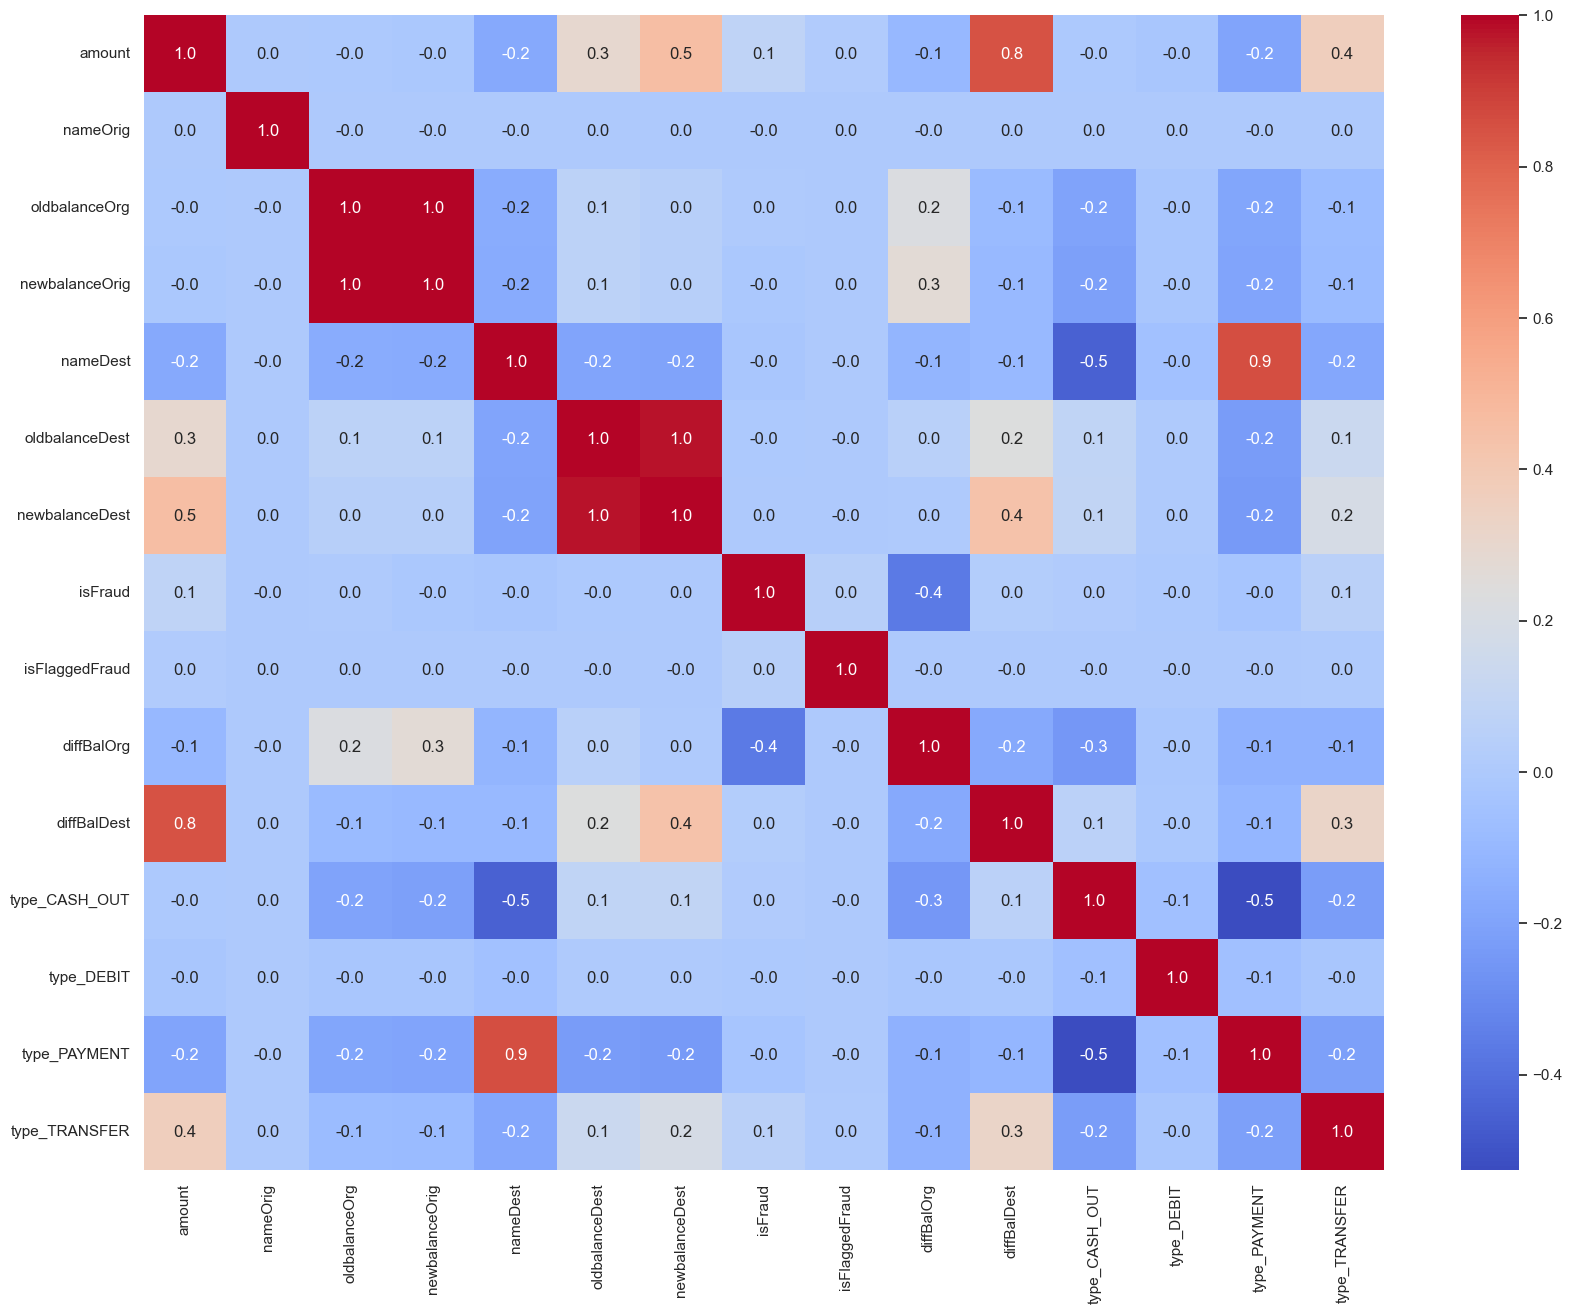

In [52]:
plt.figure(figsize=(20, 15))
sns.heatmap(df_new.corr(), annot=True, fmt= '.1f', cmap="coolwarm")
sns.set(font_scale=2.25)
plt.show()

In [57]:
corr_matrix = df_new.corr()
corr_matrix["isFlaggedFraud"].sort_values(ascending=False)

isFlaggedFraud    1.000000
isFraud           0.044109
amount            0.012295
type_TRANSFER     0.005245
oldbalanceOrg     0.003835
newbalanceOrig    0.003776
nameOrig          0.000667
type_DEBIT       -0.000128
diffBalOrg       -0.000230
diffBalDest      -0.000242
oldbalanceDest   -0.000513
newbalanceDest   -0.000529
nameDest         -0.001122
type_PAYMENT     -0.001133
type_CASH_OUT    -0.001168
Name: isFlaggedFraud, dtype: float64

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


X_train, X_test, y_train, y_test = train_test_split(X_balanced,y_balanced,test_size=0.3,random_state=42)

In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8907645, 14)
(3817563, 14)
(8907645,)
(3817563,)


In [24]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix

Model Name: Logistic_Regression
Accuracy :  0.9988167844250376
Classification Report : 
                precision    recall  f1-score   support

           0       1.00      1.00      1.00   1908698
           1       1.00      1.00      1.00   1908865

    accuracy                           1.00   3817563
   macro avg       1.00      1.00      1.00   3817563
weighted avg       1.00      1.00      1.00   3817563

ROC AUC Score :  0.9999039678367871


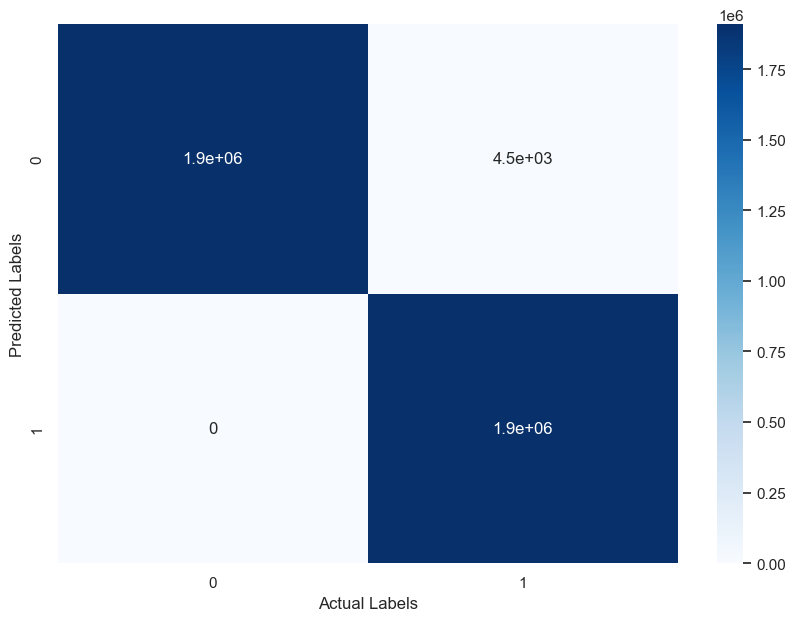



Model Name: Random_Forest
Accuracy :  1.0
Classification Report : 
                precision    recall  f1-score   support

           0       1.00      1.00      1.00   1908698
           1       1.00      1.00      1.00   1908865

    accuracy                           1.00   3817563
   macro avg       1.00      1.00      1.00   3817563
weighted avg       1.00      1.00      1.00   3817563

ROC AUC Score :  1.0


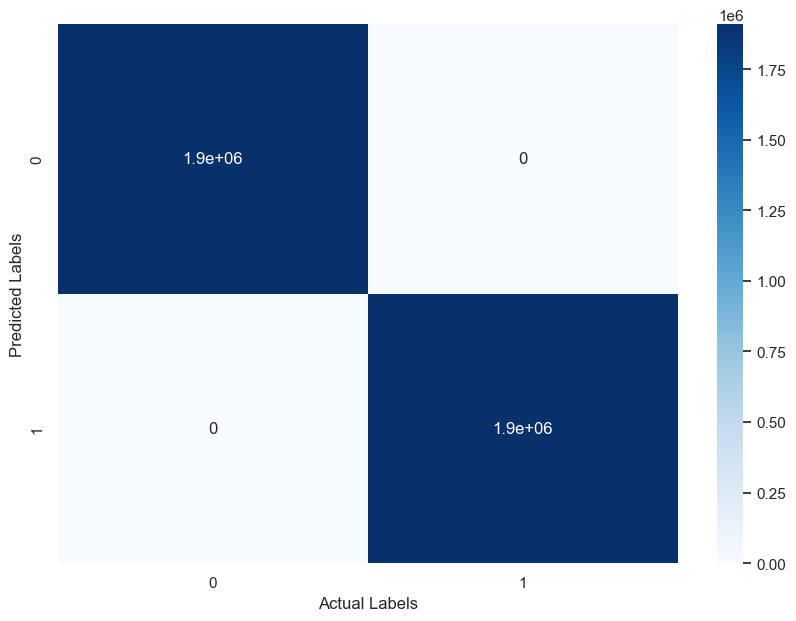

C:\Users\kisho\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:16:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model Name: XGBoost
Accuracy :  1.0
Classification Report : 
                precision    recall  f1-score   support

           0       1.00      1.00      1.00   1908698
           1       1.00      1.00      1.00   1908865

    accuracy                           1.00   3817563
   macro avg       1.00      1.00      1.00   3817563
weighted avg       1.00      1.00      1.00   3817563

ROC AUC Score :  1.0


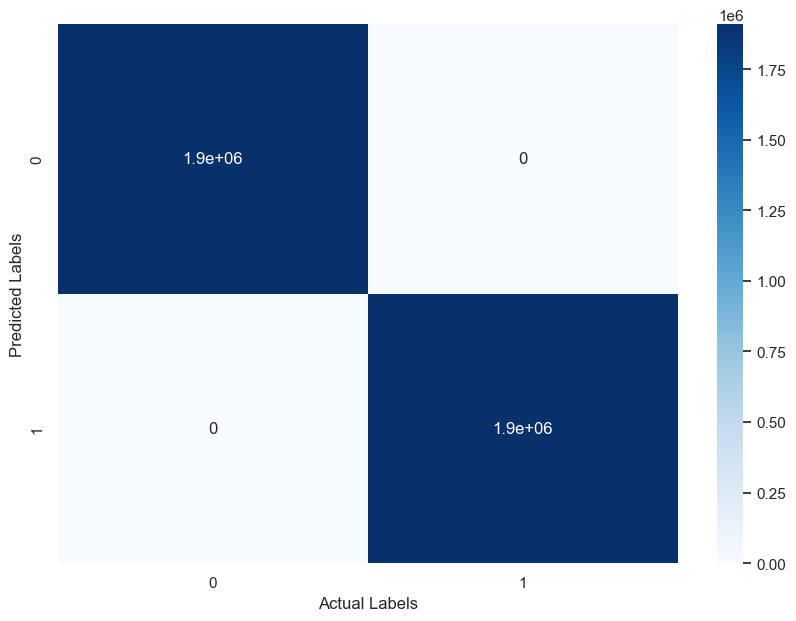



Model Name: Naive_Bayes
Accuracy :  0.9711609212474032
Classification Report : 
                precision    recall  f1-score   support

           0       1.00      0.94      0.97   1908698
           1       0.95      1.00      0.97   1908865

    accuracy                           0.97   3817563
   macro avg       0.97      0.97      0.97   3817563
weighted avg       0.97      0.97      0.97   3817563

ROC AUC Score :  0.9999977275167067


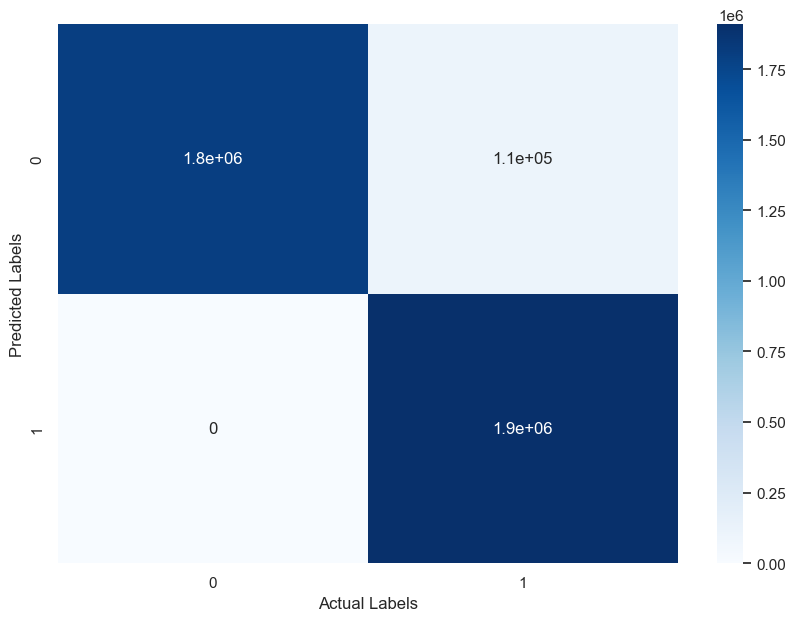



Model Name: K_Nearest_Neighbors
Accuracy :  1.0
Classification Report : 
                precision    recall  f1-score   support

           0       1.00      1.00      1.00   1908698
           1       1.00      1.00      1.00   1908865

    accuracy                           1.00   3817563
   macro avg       1.00      1.00      1.00   3817563
weighted avg       1.00      1.00      1.00   3817563

ROC AUC Score :  1.0


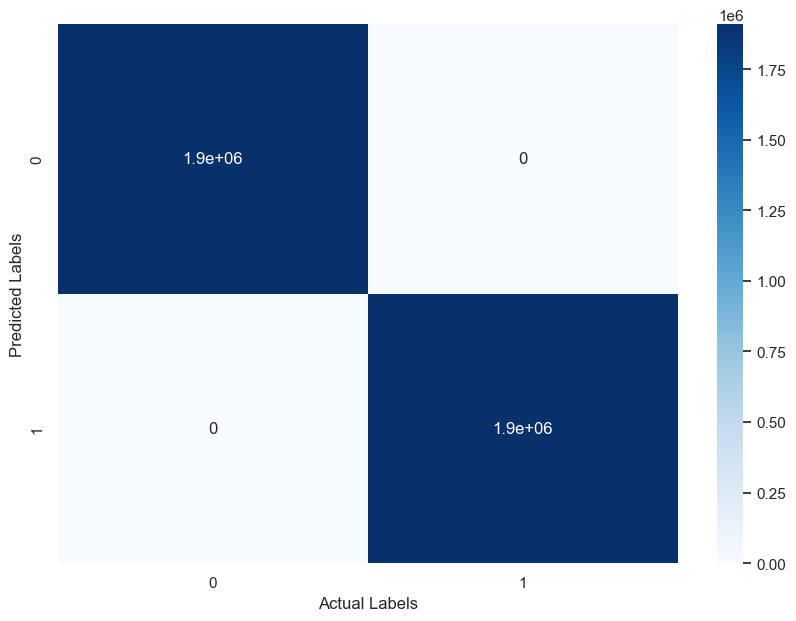



Model Name: Decision_Tree
Accuracy :  1.0
Classification Report : 
                precision    recall  f1-score   support

           0       1.00      1.00      1.00   1908698
           1       1.00      1.00      1.00   1908865

    accuracy                           1.00   3817563
   macro avg       1.00      1.00      1.00   3817563
weighted avg       1.00      1.00      1.00   3817563

ROC AUC Score :  1.0


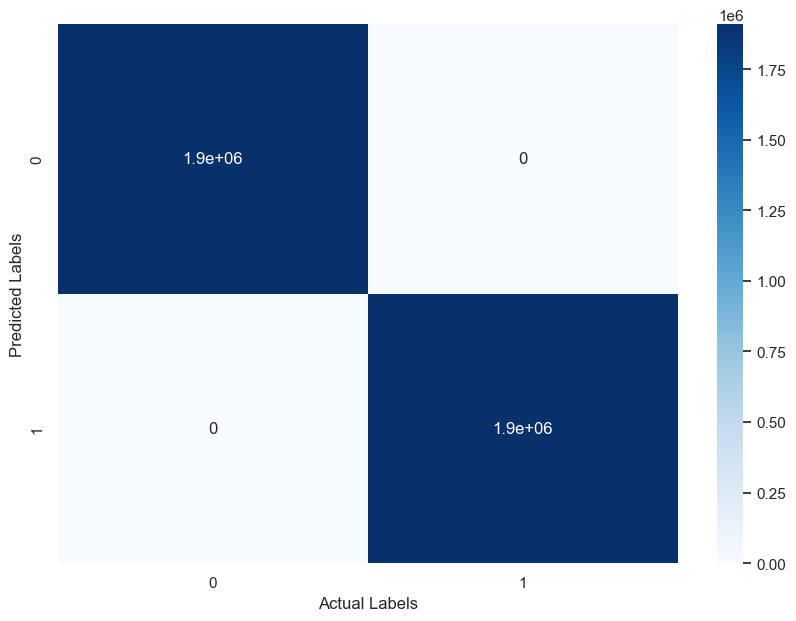

In [27]:
models = { "Logistic_Regression": LogisticRegression(max_iter=1000),
    "Random_Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Naive_Bayes": GaussianNB(),
    "K_Nearest_Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision_Tree": DecisionTreeClassifier(random_state=42) }


def evaluate_model(model,X_train,X_test,y_train,y_test,model_name):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    

    print(f'Model Name: {model_name}')
    print('Accuracy : ',accuracy_score(y_test,y_pred))

    
    print('Classification Report : \n ',classification_report(y_test,y_pred))
    
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        print('ROC AUC Score : ', roc_auc_score(y_test, y_prob, multi_class='ovr'))
    else:
        print('ROC AUC Score cannot be calculated for this model.')

    plt.figure(figsize = (10,7))
    sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,cmap = 'Blues')
    plt.xlabel('Actual Labels')
    plt.ylabel('Predicted Labels')
    plt.show()
    
    print('\n')

for model_name,model in models.items():
    evaluate_model(model,X_train,X_test,y_train,y_test,model_name)